In [1]:
from sklearn.ensemble import StackingClassifier
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis 

In [2]:
iris_data_set = pd.read_csv('SVPWM.csv')
x = iris_data_set.iloc[:, 0:12].values
y = iris_data_set.iloc[:, 12:13].values
print(iris_data_set.head())

      ea    Ia    Pin  Udc-ac     ea_std    Ia_std     Pin_std  Udc-ac_std  \
0  153.0  3.97  608.0  -0.553  49.666928  1.266093  215.754548    0.667503   
1  158.0  4.17  660.0  -0.553  49.609403  1.264956  215.899245    0.667133   
2  154.0  3.97  612.0  -0.704  49.550096  1.263539  215.963696    0.667098   
3  154.0  3.97  612.0  -0.553  49.488173  1.261804  216.027953    0.666795   
4  151.0  3.97  600.0  -0.704  49.423991  1.260357  216.071083    0.666885   

      ea_RMS    Ia_RMS     Pin_RMS  Udc-ac_RMS  target  
0  91.876811  2.398781  282.674316    0.216347       0  
1  92.043813  2.403006  283.334705    0.214536       0  
2  92.204778  2.407030  283.947373    0.212675       0  
3  92.366749  2.411205  284.558851    0.210915       0  
4  92.524696  2.415229  285.159538    0.209154       0  


In [3]:

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(x, y)
for train_index, test_index in sss.split(x,  y):
    x_train, x_val = x[train_index], x[test_index]
    y_train, y_val = y[train_index],y[test_index]

print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(121518, 12) (30380, 12) (121518, 1) (30380, 1)


In [4]:
def category_show(model, x_val, y_val):
    target_names = ['0', '1', '2', '3']
    y_pred = model.predict(x_val)
    print(classification_report(y_val, y_pred, target_names=target_names))
    cm = confusion_matrix(y_val, y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()

C:\Users\XNYDLBH\AppData\Local\Temp\ipykernel_3976\2393757633.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


score_stack = 0.9846938775510204
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7596
           1       0.97      0.99      0.98      7594
           2       0.99      0.97      0.98      7595
           3       0.99      0.98      0.98      7595

    accuracy                           0.98     30380
   macro avg       0.98      0.98      0.98     30380
weighted avg       0.98      0.98      0.98     30380



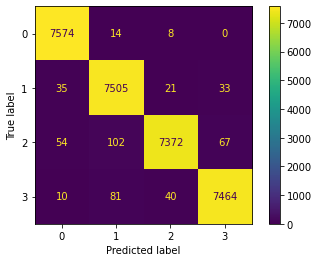

In [13]:

model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(x_train, y_train)
score_rf = model_rf.score(x_val, y_val)
print('score_stack =', score_rf)
category_show(model_rf, x_val, y_val)


score_rf = 0.8915075707702436
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7596
           1       0.87      0.87      0.87      7594
           2       0.87      0.86      0.87      7595
           3       0.88      0.90      0.89      7595

    accuracy                           0.89     30380
   macro avg       0.89      0.89      0.89     30380
weighted avg       0.89      0.89      0.89     30380

CPU times: total: 109 ms
Wall time: 112 ms


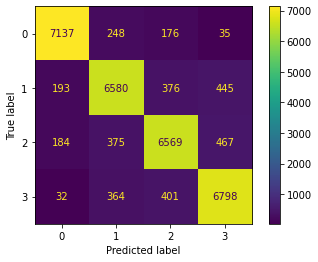

In [6]:
%%time
score_rf = model_rf.score(x_val, y_val)
print('score_rf =', score_rf)
category_show(model_rf, x_val, y_val)

In [10]:
%%time
model_XGB = XGBClassifier(learning_rate=0.1, objective='multi:softproba', num_class=4, n_estimators=80, 
                                                         max_depth=15, subsample=0.7, gamma=0, n_jobs=-1, use_label_encoder=False)
model_XGB.fit(x_train, y_train)
score_XGB = model_XGB.score(x_val, y_val)
print('score_XGB =', score_XGB)
category_show(model_XGB, x_val, y_val)

KeyboardInterrupt: 

score_XGB = 0.915997366688611
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7596
           1       0.92      0.92      0.92      7594
           2       0.95      0.81      0.87      7595
           3       0.84      0.95      0.89      7595

    accuracy                           0.92     30380
   macro avg       0.92      0.92      0.92     30380
weighted avg       0.92      0.92      0.92     30380

CPU times: total: 3.12 s
Wall time: 293 ms


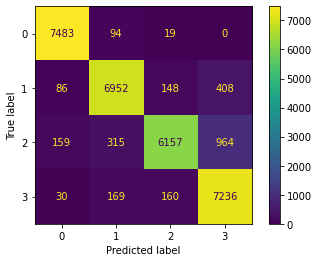

In [8]:
%%time
score_XGB = model_XGB.score(x_val, y_val)
print('score_XGB =', score_XGB)
category_show(model_XGB, x_val, y_val)

h:\an\envs\p38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


h:\an\envs\p38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


score_MLP = 0.657208689927584
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7596
           1       0.55      0.68      0.61      7594
           2       0.67      0.56      0.61      7595
           3       0.63      0.56      0.59      7595

    accuracy                           0.66     30380
   macro avg       0.66      0.66      0.66     30380
weighted avg       0.66      0.66      0.66     30380



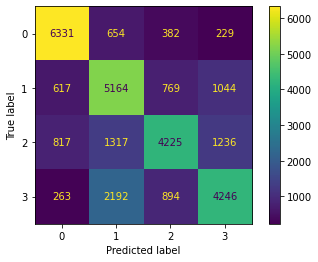

In [9]:
model_MLP = MLPClassifier(
    hidden_layer_sizes=(64,64,64,64 ), 
    alpha=0.001, )                                                                                                
model_MLP.fit(x_train, y_train)
score_MLP = model_MLP.score(x_val, y_val)
print('score_MLP =', score_MLP)
category_show(model_MLP, x_val, y_val)

score_MLP = 0.9103028308097433
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7596
           1       0.85      0.92      0.89      7594
           2       0.92      0.89      0.90      7595
           3       0.94      0.87      0.90      7595

    accuracy                           0.91     30380
   macro avg       0.91      0.91      0.91     30380
weighted avg       0.91      0.91      0.91     30380

CPU times: total: 1.36 s
Wall time: 223 ms


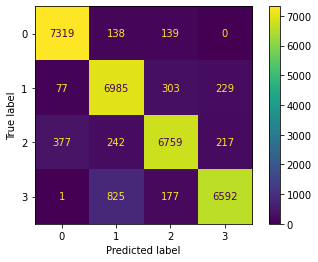

In [ ]:
%%time
score_MLP = model_MLP.score(x_val, y_val)
print('score_MLP =', score_MLP)
category_show(model_MLP, x_val, y_val)

h:\an\envs\p38\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
h:\an\envs\p38\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
h:\an\envs\p38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
h:\an\envs\p38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
h:\an\envs\p38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by u

score_stack = 0.9833772218564846
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7596
           1       0.98      0.98      0.98      7594
           2       0.98      0.97      0.98      7595
           3       0.98      0.98      0.98      7595

    accuracy                           0.98     30380
   macro avg       0.98      0.98      0.98     30380
weighted avg       0.98      0.98      0.98     30380



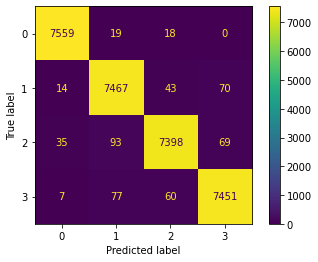

In [ ]:
estimators = [
    ('rf', model_rf),
    ('XGB', model_XGB),
    ('MLP', model_MLP),
 
]
model_stack = StackingClassifier(
    estimators=estimators, final_estimator= SVC(random_state=42)
)
model_stack.fit(x_train, y_train)
score_stack = model_stack.score(x_val, y_val)
print('score_stack =', score_stack)
category_show(model_stack, x_val, y_val)

In [ ]:
%%time
score_stack = model_stack.score(x_val, y_val)
print('score_stack =', score_stack)

score_stack = 0.9814022383146808
CPU times: total: 15.1 s
Wall time: 11.8 s


h:\an\envs\p38\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
h:\an\envs\p38\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
h:\an\envs\p38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


score_stack = 0.9689269256089532
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7596
           1       0.96      0.96      0.96      7594
           2       0.99      0.94      0.96      7595
           3       0.93      0.98      0.96      7595

    accuracy                           0.97     30380
   macro avg       0.97      0.97      0.97     30380
weighted avg       0.97      0.97      0.97     30380



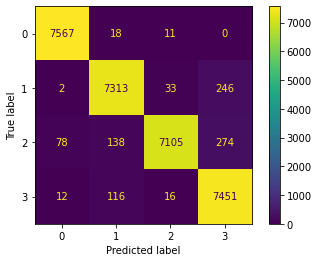

In [ ]:
estimators = [
    ('rf', model_rf),
    ('XGB', model_XGB),
    ('MLP', model_MLP),
 
]
model_stack = VotingClassifier(
    estimators=estimators, voting="soft"
)
model_stack.fit(x_train, y_train)
score_stack = model_stack.score(x_val, y_val)
print('score_stack =', score_stack)
category_show(model_stack, x_val, y_val)

score_stack = 0.9689269256089532
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7596
           1       0.96      0.96      0.96      7594
           2       0.99      0.94      0.96      7595
           3       0.93      0.98      0.96      7595

    accuracy                           0.97     30380
   macro avg       0.97      0.97      0.97     30380
weighted avg       0.97      0.97      0.97     30380

CPU times: total: 6.36 s
Wall time: 232 ms


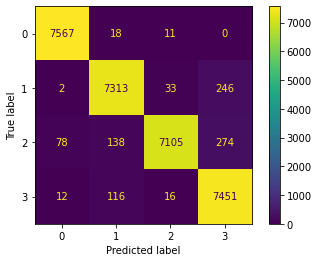

In [ ]:
%%time
score_stack = model_stack.score(x_val, y_val)
print('score_stack =', score_stack)
category_show(model_stack, x_val, y_val)

In [ ]:
model_SVC = SVC(random_state=42)
model_SVC.fit(x_train, y_train)

h:\an\envs\p38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

score_SVC = 0.38298222514812374
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      7596
           1       0.30      0.48      0.37      7594
           2       0.57      0.23      0.33      7595
           3       0.33      0.31      0.32      7595

    accuracy                           0.38     30380
   macro avg       0.42      0.38      0.38     30380
weighted avg       0.42      0.38      0.38     30380

CPU times: total: 6min 25s
Wall time: 6min 25s


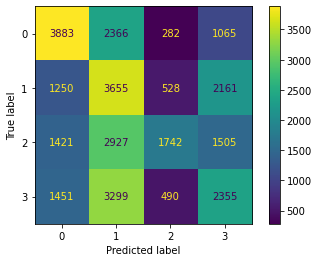

In [ ]:
%%time
score_SVC = model_SVC.score(x_val, y_val)
print('score_SVC =', score_SVC)
category_show(model_SVC, x_val, y_val)